In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv("../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
df.describe()


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [7]:
df.shape

(550, 7)

In [8]:
df.size

3850

In [9]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [10]:
top_10=df.sort_values("Reviews",ascending=False)[:10]
top_10

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


<AxesSubplot:ylabel='Genre'>

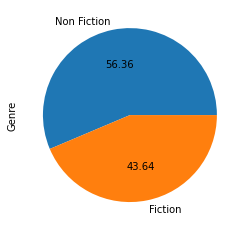

In [11]:
df["Genre"].value_counts().plot(kind="pie", autopct='%.2f',labels=df["Genre"].unique())

<AxesSubplot:ylabel='Year'>

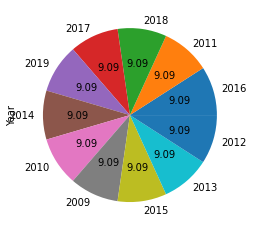

In [12]:
df["Year"].value_counts().plot(kind="pie", autopct='%.2f',labels=df["Year"].unique())

<AxesSubplot:xlabel='User Rating', ylabel='count'>

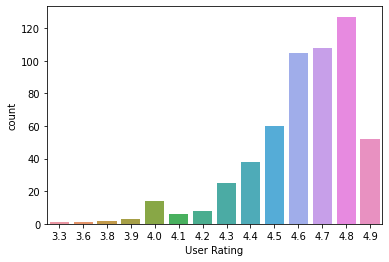

In [13]:
sns.countplot(x = df['User Rating'])

In [14]:
df['User Rating'].max()

4.9

In [15]:
best_sellers = df[df["User Rating"]==4.9]
best_sellers=best_sellers.groupby("Author")["User Rating"].mean().reset_index()
best_sellers

,Author,User Rating
0,Alice Schertle,4.9
1,Bill Martin Jr.,4.9
2,Brandon Stanton,4.9
3,Chip Gaines,4.9
4,Dav Pilkey,4.9
5,Dr. Seuss,4.9
6,Emily Winfield Martin,4.9
7,Eric Carle,4.9
8,J. K. Rowling,4.9
9,J.K. Rowling,4.9


In [16]:
p_mean=df.groupby("Year").mean()
p_mean['Year'] = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
p_mean.reset_index(drop=True, inplace=True)
p_mean

,User Rating,Reviews,Price,Year
0,4.584,4710.12,15.40,2009
1,4.558,5479.62,13.48,2010
2,4.558,8100.82,15.10,2011
3,4.532,13090.92,15.30,2012
4,4.554,13098.14,14.60,2013
5,4.622,15859.94,14.64,2014
6,4.648,14233.38,10.42,2015
7,4.678,14196.00,13.18,2016
8,4.660,12888.40,11.38,2017
9,4.668,13930.42,10.52,2018


<AxesSubplot:xlabel='Year', ylabel='Price'>

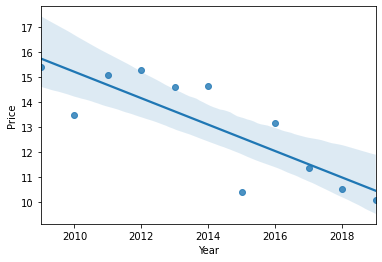

In [17]:
sns.regplot(x="Year", y="Price",data=p_mean)

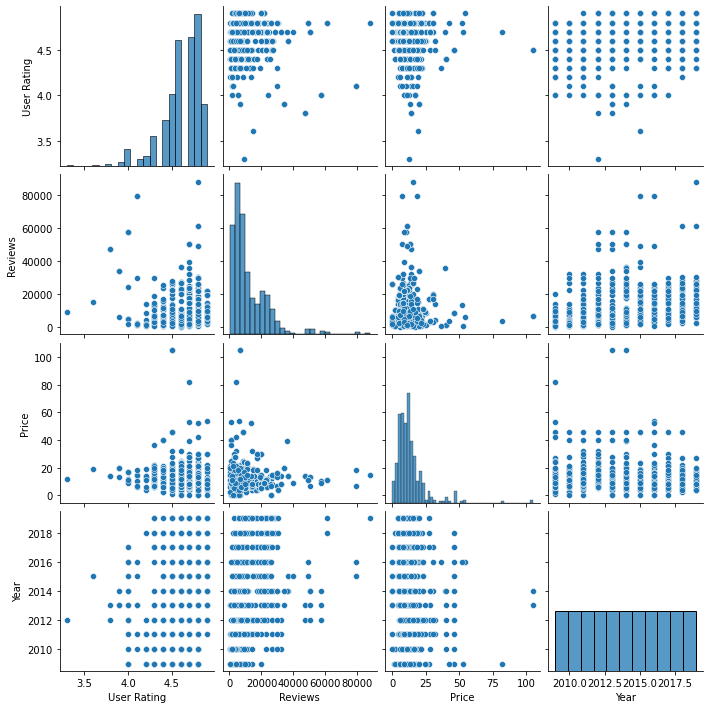

In [18]:
sns.pairplot(df)